Цель: применить на практике методы по оценке качества данных.

Описание задания:

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.
Этапы работы:

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

9. *Попробуйте математически преобразовать признак Age.

10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from scikitplot.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import missingno as msno 
# missingno предоставляет удобные средства для визуальной оценки пропусков

from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

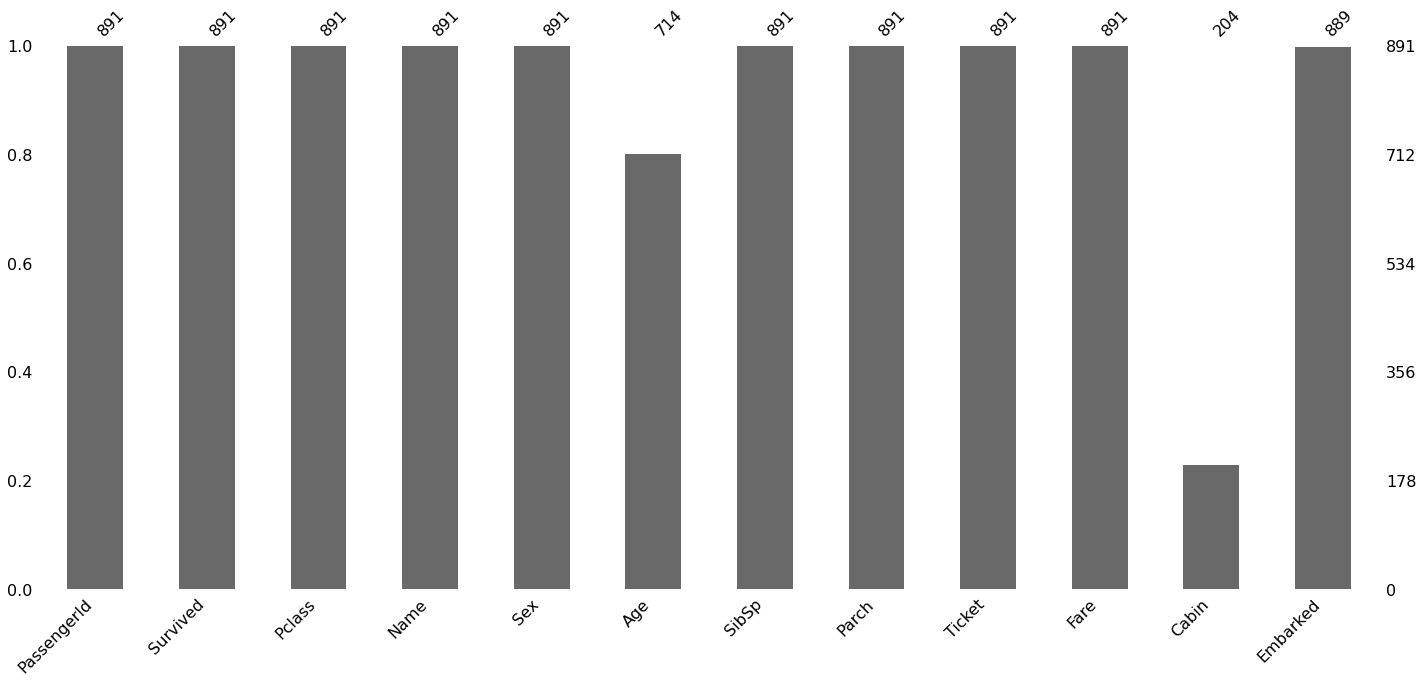

In [4]:
msno.bar(data)
# визуализируем пропуски

In [5]:
data_desc = data.describe()
data_desc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [6]:
train = data.copy()

In [7]:
# оставляю по условию столбцы ['Survived', 'Age', 'Fare']
train = train[['Survived', 'Age', 'Fare']]
train.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [8]:
train.isna().mean()*100 # пропущены значения только в 'Age'. Удалю

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [9]:
 train = train.dropna(subset=['Age'])
 train

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [10]:
# train.isna().mean()*100

In [11]:
X = train[['Age', 'Fare']]
y = train['Survived']

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)
# приведем признаки к одному масштабу

(array([ 2.33862105e-16, -5.97094736e-17]), array([1., 1.]))

In [13]:
model = LogisticRegression()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1984)

In [15]:
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
model.score(X_test, y_test)

0.6223776223776224

In [17]:
predictions = model.predict_proba(X_test)

In [18]:
y_pred = model.predict(X_test)

In [19]:
pd.DataFrame(confusion_matrix(y_pred, y_test),
             columns = ['Forecast 0', 'Forecast 1'],
             index = ['Actual 0', 'Actual 1'])

,Forecast 0,Forecast 1
Actual 0,65,43
Actual 1,11,24


In [20]:
metrix1 = pd.DataFrame({'name': ['accuracy', 'precision', 'recall'],\
                        'values': [f' = {metrics. accuracy_score (y_test, y_pred)}',\
                                   f' = {metrics. precision_score (y_test, y_pred)}',\
                                   f' = {metrics. recall_score (y_test, y_pred)}']})
metrix1

,name,values
0,accuracy,= 0.6223776223776224
1,precision,= 0.6857142857142857
2,recall,= 0.3582089552238806


In [21]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

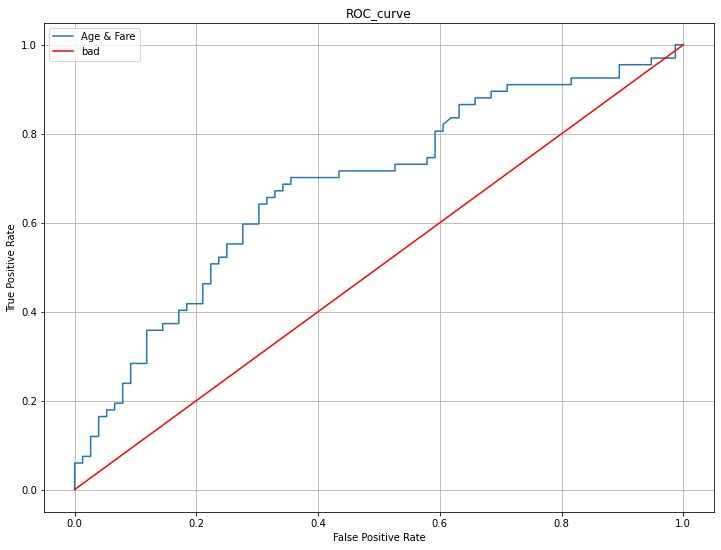

In [22]:
plt.figure(figsize=(12,9))
plt.plot( fpr, tpr, label='Age & Fare')

plt.plot(np.linspace(0, 1), np.linspace(0, 1), color ='red', label='bad')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.grid()
plt.legend(loc=0)

3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [23]:
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


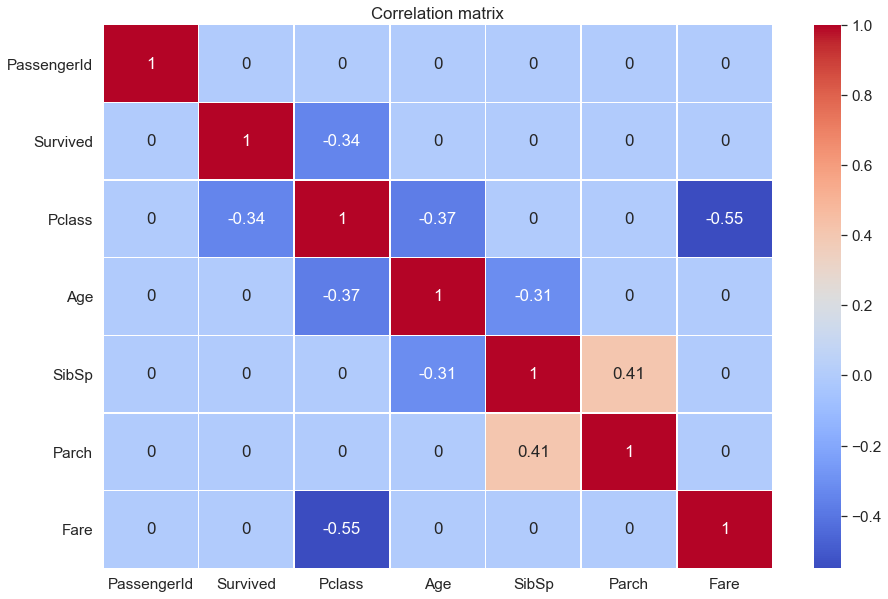

In [24]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()


Стоимость билета связана с принадлежностью к классу, что и понятно. Fare можно не брать в Модель.

Возраст тоже несколько связан с классом. Состоятельные люди из первого класса скорее старше, чем менее состоятельные пассажиры из других классов. 

Количество родителей, детей (Parch) связано с количество братьев, сестер, сводных братьев, сводных сестер, супругов (SibSp), что логично.

Также есть связь между выживаемостью и принадлежностью к классу, что подтверждено исторически.
Хоть и неоднозначно. 

SibSp связано с возрастом, хоть и слабо. 

Мой вывод: на Титанике больше шансов попасть в шлюпки был у женщин и детей, особенно, если они из первого класса.

In [25]:
df.isna().mean()*100 # количество пропусков в процентах. Ответ на вопрос п.5 а)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
# пропуски в Embarked заменю модой. 
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)

In [29]:
# Cabin имеет 77 процентов пропущенных значений. надо удалять 
del df['Cabin']
# Ticket мы ничего не знаем о том, что означают обозначения билетов, 
# несут ли они какую-то информацию, нам полезную. 
# Возможно, из обозначения билета можно понять принадлежность к классу, но 
# данные по классам у нас есть. Думаю, можно билеты удалить
del df['Ticket']
# Fare удалю, так как принадлежность к классу известна
del df['Fare']
# Name удалю
del df['Name']
# PassengerId удалю
del df['PassengerId']

In [30]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# # Либо закодируем столбец Sex с помощью числовых значений
# map_dict = {'male' : 0, 'female' : 1}
# titanic['Sex'] = titanic['Sex'].map(map_dict)

In [31]:
df = pd.get_dummies (df, columns=['Embarked'])

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0,0,1
887,1,1,0,19.0,0,0,0,0,1
888,0,3,0,NaN,1,2,0,0,1
889,1,1,1,26.0,0,0,1,0,0


In [33]:
# сгруппируем пассажиров по полу и классу каюты
Age_ = df.groupby(['Sex', 'Pclass'])
# найдем медианный возраст с учетом получившихся групп
Age_['Age'].median()

Sex  Pclass
0    1         35.0
     2         28.0
     3         21.5
1    1         40.0
     2         30.0
     3         25.0
Name: Age, dtype: float64

In [34]:
# замена пропусков соответствующим медианным значением
df['Age'] = Age_['Age'].apply(lambda x: x.fillna(x.median()))

In [35]:
df.isna().mean()*100

Survived      0.0
Pclass        0.0
Sex           0.0
Age           0.0
SibSp         0.0
Parch         0.0
Embarked_C    0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64

Text(0.5, 1.0, 'Распределение Age до заполнения внутригрупповой медианой')

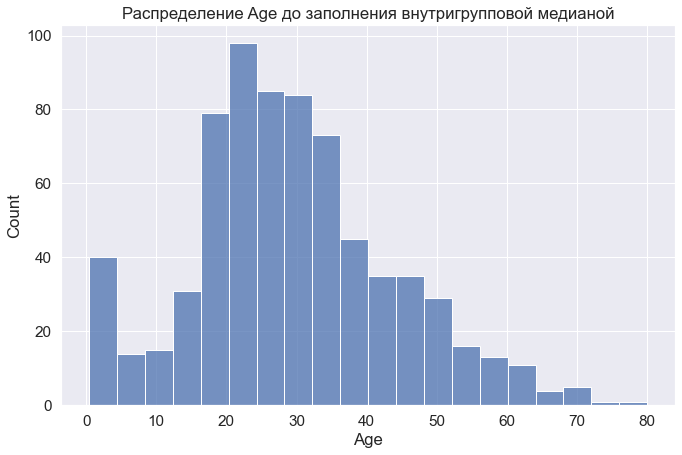

In [36]:
sns.histplot(data['Age'], bins = 20)
plt.title('Распределение Age до заполнения внутригрупповой медианой')

Text(0.5, 1.0, 'Распределение Age после заполнения внутригрупповой медианой')

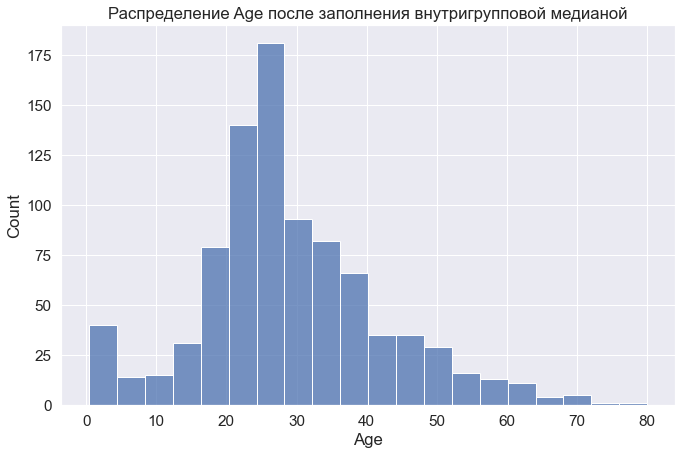

In [37]:
sns.histplot(df['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой')

7. Поищем выбросы. На приведенном ниже графике, "выбросные" значения возрастов не стоит считать выбросами.

Скорее всего, эти значения реальны.

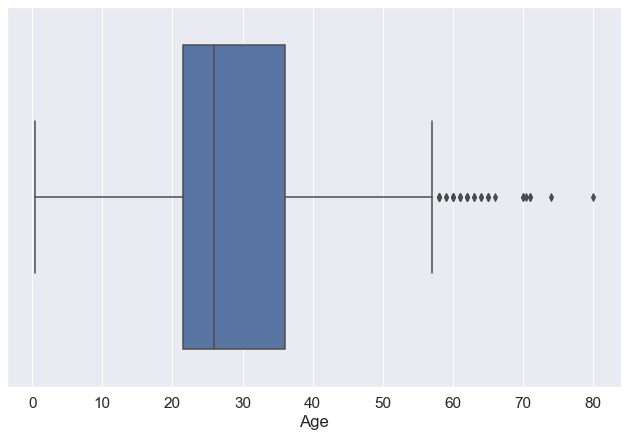

In [38]:
# df = pd.DataFrame(data=df, columns=["Age"])
# sns.boxplot(x="variable", y="value", data=pd.melt(df)); # можно визуализировать несколько признаков

Age_box = df['Age']
sns.boxplot(x=Age_box);

10. Обучите ту же модель, что в п. 2 на преобразованных данных.

Посчитайте ту же, что в п. 2 метрику

In [39]:
y2 = df['Survived']

In [40]:
del df['Survived']
X2 = df
X2.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,3,0,26.0,0,0,0,0,1


In [41]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
X2.mean(axis=0), X2.std(axis=0)
# приведем признаки к одному масштабу

(array([-8.77213254e-17, -1.15632656e-16,  2.15315981e-16,  4.38606627e-17,
         5.38289951e-17, -1.99366649e-17,  0.00000000e+00, -8.37339924e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [42]:
model2 = LogisticRegression()

In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=1984)

In [44]:
model2.fit(X2_train, y2_train)

LogisticRegression()

In [45]:
model2.score(X2_test, y2_test)

0.7932960893854749

In [46]:
predictions2 = model2.predict_proba(X2_test)

In [47]:
y2_pred = model2.predict(X2_test)

In [48]:
pd.DataFrame(confusion_matrix(y2_pred, y2_test),
             columns = ['Forecast 0', 'Forecast 1'],
             index = ['Actual 0', 'Actual 1'])

,Forecast 0,Forecast 1
Actual 0,94,19
Actual 1,18,48


In [49]:
metrix2 = pd.DataFrame({'name': ['accuracy2', 'precision2', 'recall2'],\
                        'values': [f' = {metrics. accuracy_score (y2_test, y2_pred)}',\
                                   f' = {metrics. precision_score (y2_test, y2_pred)}',\
                                   f' = {metrics. recall_score (y2_test, y2_pred)}']})
metrix2

,name,values
0,accuracy2,= 0.7932960893854749
1,precision2,= 0.7272727272727273
2,recall2,= 0.7164179104477612


In [50]:
# получаем значения false и true positive rate для различных значений порога
fpr2, tpr2, thres2 = roc_curve( y2_test, predictions2[:, 1] )

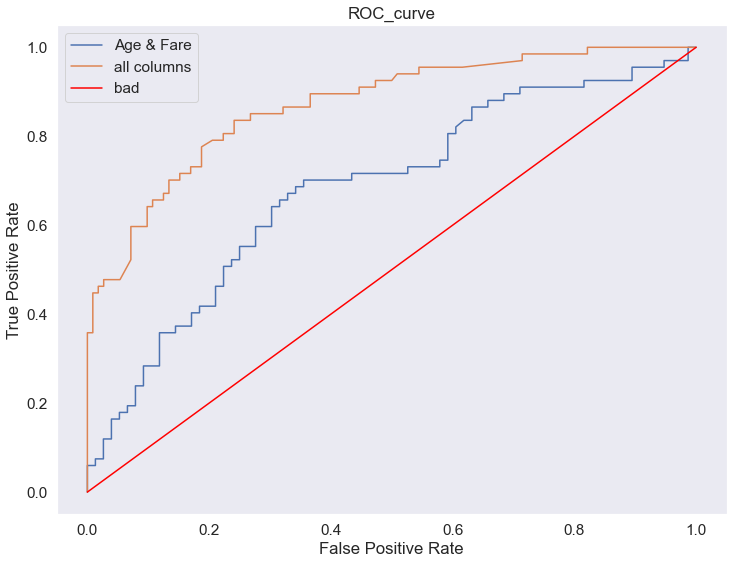

In [51]:
plt.figure(figsize=(12,9))
plt.plot( fpr, tpr, label='Age & Fare')
plt.plot( fpr2, tpr2, label='all columns')

plt.plot(np.linspace(0, 1), np.linspace(0, 1), color ='red', label='bad')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.grid()
plt.legend(loc=0)

In [52]:
print(metrix1)
print('____________________')
print(metrix2)

        name                 values
0   accuracy   = 0.6223776223776224
1  precision   = 0.6857142857142857
2     recall   = 0.3582089552238806
____________________
         name                 values
0   accuracy2   = 0.7932960893854749
1  precision2   = 0.7272727272727273
2     recall2   = 0.7164179104477612


11. При сравнении двух моделей, реализованных в данной работе, можно сделать следующий вывод:

- восстановление пропусков данных при попытке сохранить количество данных и увеличение признаков

привело к существенному повышению качества;